In [ ]:
# 인공지능으로 가위바위보 판독해보기 세번째
#  사진 데이터를  기존 600개(train:300,   test:300) 에서 
#                     3600개(train:3000, test:600)로 늘림

In [1]:
from PIL import Image
import os, glob

In [ ]:
# 정확도를 높이기 위해 새로 추가한 파일을 112*112로 변경함
# 데이터 리싸이징

In [2]:
def resize_images(img_path):
	images=glob.glob(img_path + "/*.jpg")  
    
	print(len(images), " images to be resized.")

    # 파일마다 모두 112x112 사이즈로 바꾸어 저장합니다.
	target_size=(112,112)
	for img in images:
		old_img=Image.open(img)
		new_img=old_img.resize(target_size,Image.ANTIALIAS)
		new_img.save(img, "JPEG")
    
	print(len(images), " images resized.")
	
# 가위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/scissor1"
resize_images(image_dir_path)

print("가위 이미지 resize 완료!")

1000  images to be resized.
1000  images resized.
가위 이미지 resize 완료!


In [3]:
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/rock1"
resize_images(image_dir_path)

print("바위 이미지 resize 완료!")

image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/paper1"
resize_images(image_dir_path)

print("보 이미지 resize 완료!")

1000  images to be resized.
1000  images resized.
바위 이미지 resize 완료!
1000  images to be resized.
1000  images resized.
보 이미지 resize 완료!


In [ ]:
# 가위1000 , 바위 1000, 보1000 개로 사진 데이터을 늘림

In [ ]:
# 데이터 라벨링 

In [4]:
import numpy as np

def load_data(img_path, number_of_data=3000):  # 가위바위보 이미지 개수 총합에 주의하세요.
    # 가위 : 0, 바위 : 1, 보 : 2
    img_size=112
    color=3
    #이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2) 데이터를 담을 행렬(matrix) 영역을 생성합니다.
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)

    idx=0
    for file in glob.iglob(img_path+'/scissor1/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0   # 가위 : 0
        idx=idx+1

    for file in glob.iglob(img_path+'/rock1/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=1   # 바위 : 1
        idx=idx+1  
    
    for file in glob.iglob(img_path+'/paper1/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=2   # 보 : 2
        idx=idx+1
        
    print("학습데이터(x_train)의 이미지 개수는", idx,"입니다.")
    return imgs, labels

image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper"
(x_train, y_train)=load_data(image_dir_path)
x_train_norm = x_train/255.0   # 입력은 0~1 사이의 값으로 정규화

print("x_train shape: {}".format(x_train.shape))
print("y_train shape: {}".format(y_train.shape))

학습데이터(x_train)의 이미지 개수는 3000 입니다.
x_train shape: (3000, 112, 112, 3)
y_train shape: (3000,)


라벨:  0


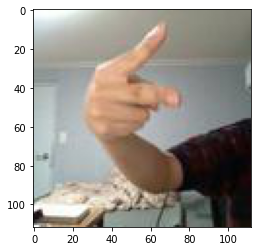

In [5]:
import matplotlib.pyplot as plt
plt.imshow(x_train[0])
print('라벨: ', y_train[0])

In [ ]:
# 딥러닝 네트워크 설계

In [8]:
import tensorflow as tf
from tensorflow import keras
import numpy as np

model=keras.models.Sequential()
model.add(keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(112,112,3)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(32, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(32, activation='relu'))
model.add(keras.layers.Dense(3, activation='softmax'))

print('Model에 추가된 Layer 개수: ', len(model.layers))

model.summary()

Model에 추가된 Layer 개수:  7
Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 110, 110, 16)      448       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 55, 55, 16)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 53, 53, 32)        4640      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 26, 26, 32)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 21632)             0         
_________________________________________________________________
dense_4 (Dense)              (None, 32)                692256    
_________________________________________________________________
dense_5 (Dense)              (

In [ ]:
# 모델 학습

In [10]:
model.compile(optimizer = 'adam',
             loss = 'sparse_categorical_crossentropy',
             metrics = ['accuracy'])

model.fit(x_train_norm, y_train, epochs=10)

Epoch 1/10
94/94 [==============================] - 1s 8ms/step - loss: 0.0274 - accuracy: 0.9923
Epoch 2/10
94/94 [==============================] - 1s 7ms/step - loss: 0.0021 - accuracy: 1.0000
Epoch 3/10
94/94 [==============================] - 1s 7ms/step - loss: 8.3144e-04 - accuracy: 1.0000
Epoch 4/10
94/94 [==============================] - 1s 7ms/step - loss: 5.6905e-04 - accuracy: 1.0000
Epoch 5/10
94/94 [==============================] - 1s 7ms/step - loss: 4.2658e-04 - accuracy: 1.0000
Epoch 6/10
94/94 [==============================] - 1s 7ms/step - loss: 4.3205e-04 - accuracy: 1.0000
Epoch 7/10
94/94 [==============================] - 1s 7ms/step - loss: 3.1825e-04 - accuracy: 1.0000
Epoch 8/10
94/94 [==============================] - 1s 7ms/step - loss: 2.1138e-04 - accuracy: 1.0000
Epoch 9/10
94/94 [==============================] - 1s 6ms/step - loss: 1.9100e-04 - accuracy: 1.0000
Epoch 10/10
94/94 [==============================] - 1s 7ms/step - loss: 1.5739e-04 - accu

In [ ]:
# 모델 성능평가를 위한 test파일을 112로 resize

In [12]:
test_scissor_image_dir_path = os.getenv("HOME") + "/aiffel/test/scissor1"
test_rock_image_dir_path = os.getenv("HOME") + "/aiffel/test/rock1"
test_paper_image_dir_path = os.getenv("HOME") + "/aiffel/test/paper1"

resize_images(test_scissor_image_dir_path)   # 테스트 가위 이미지 resize
resize_images(test_rock_image_dir_path)   # 테스트 바위 이미지 resize
resize_images(test_paper_image_dir_path)   # 테스트 보 이미지 resizev

200  images to be resized.
200  images resized.
200  images to be resized.
200  images resized.
200  images to be resized.
200  images resized.


In [ ]:
# load_data() 함수를 통해 test 이미지를 불러오기

In [18]:
image_dir_path = os.getenv("HOME") + "/aiffel/test"
(x_test, y_test)=load_data(image_dir_path)

print(f"x_test shape: {x_test.shape}")
print(f"y_test shape: {y_test.shape}")

학습데이터(x_train)의 이미지 개수는 600 입니다.
x_test shape: (3000, 112, 112, 3)
y_test shape: (3000,)


In [22]:
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose = 2)

print("test_loss : {}".format(test_loss))
print("test_accuracy : {}".format(test_accuracy))

94/94 - 0s - loss: 270.8129 - accuracy: 0.0913
test_loss : 270.8128662109375
test_accuracy : 0.09133332967758179


In [ ]:
# 성능 평가 결과 정확도가 약 9% 로 충격적임
# 데이터가 많이 추가 되었지만 정확도가 떨어진 이유를 모르겠음

In [ ]:
# 잘못 예측된 데이터들 살펴보기

In [24]:
predicted_result = model.predict(x_test)  
predicted_labels = np.argmax(predicted_result, axis=1)

예측확률분포: [2.9606283e-01 7.0393687e-01 2.5038361e-07]
라벨: 0, 예측결과: 1


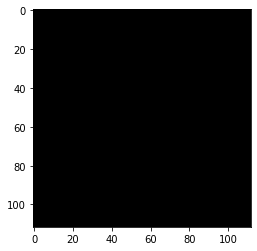

예측확률분포: [2.9606283e-01 7.0393687e-01 2.5038361e-07]
라벨: 0, 예측결과: 1


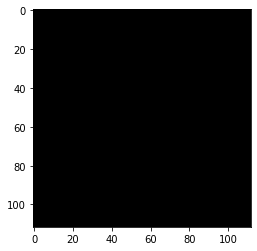

예측확률분포: [0. 0. 1.]
라벨: 0, 예측결과: 2


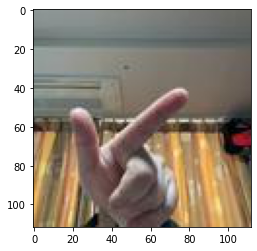

예측확률분포: [2.9606283e-01 7.0393687e-01 2.5038361e-07]
라벨: 0, 예측결과: 1


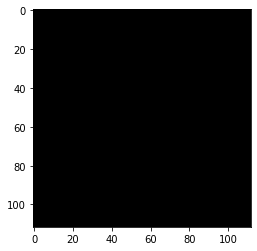

예측확률분포: [2.9606283e-01 7.0393687e-01 2.5038361e-07]
라벨: 0, 예측결과: 1


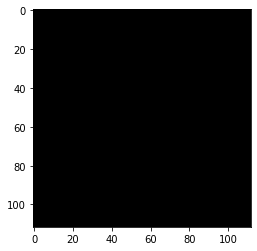

In [25]:
import random
wrong_predict_list=[]
for i, _ in enumerate(predicted_labels):
    # i번째 test_labels과 y_test이 다른 경우만 모음
    if predicted_labels[i] != y_test[i]:
        wrong_predict_list.append(i)

# wrong_predict_list 에서 랜덤하게 5개만 뽑기
samples = random.choices(population=wrong_predict_list, k=5)

for n in samples:
    print("예측확률분포: " + str(predicted_result[n]))
    print("라벨: " + str(y_test[n]) + ", 예측결과: " + str(predicted_labels[n]))
    plt.imshow(x_test[n], cmap=plt.cm.binary)
    plt.show()

In [ ]:
# 소고
# 성능 평가 결과 정확도가 약 9% 로 낮아진 이유가 추가된 파일이 업로드 및 리사이즈 중에 검은색으로 된 것을 확인
#  3600개의 사진 파일을 확인했으나 사진상 이상은 없었음. 이유 못찾음
# 파일을 추가할 방법을 다른 방법으로 새로 찾아야 할 듯 함